## Data Collection and preprocessing

In [810]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns the notebook can display
pd.set_option('display.max_columns', 200)

In [811]:
#creating a dataframe for the dataset
house = pd.read_csv('housing.csv')

In [812]:
#viewing the dataset
house

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


In [813]:
#display the first 5 rows.
house.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [814]:
house.shape

(384977, 22)

In [815]:
#display concise summary information about the DataFrame.
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [816]:
#retrieve the column names of the DataFrame.
house.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [817]:
#retrieve the dimensions of the DataFrame.
house.shape

(384977, 22)

In [818]:
house.region.value_counts()

region
jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: count, Length: 404, dtype: int64

In [819]:
house.state.value_counts().head(8)

state
ca    33085
fl    31929
tx    31137
nc    18628
mi    14529
ga    13841
oh    12884
tn    11541
Name: count, dtype: int64

In [820]:
house.type.unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse', 'loft',
       'manufactured', 'cottage/cabin', 'flat', 'in-law', 'land',
       'assisted living'], dtype=object)

In [821]:
#Getting the percentage of the null records
null_values=pd.DataFrame(house.isnull().sum(),columns=['null_sum'])
null_values=null_values[null_values.null_sum>0]
null_values['percentage']=(null_values.null_sum/len(house ))*100
null_values=null_values.sort_values(by='percentage',ascending=False)
null_values

,null_sum,percentage
parking_options,140687,36.544261
laundry_options,79026,20.527460
lat,1918,0.498212
long,1918,0.498212
description,2,0.000520


In [822]:
house.drop(columns=['url','id','image_url','description','region_url'],inplace=True)

In [823]:
house.shape

(384977, 17)

In [824]:
house[20000:20005]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
20000,colorado springs,999,apartment,561,1,1.0,1,1,1,0,0,0,NaN,NaN,38.9325,-104.795,co
20001,colorado springs,1350,apartment,701,1,1.0,1,1,0,0,0,0,w/d in unit,attached garage,38.9497,-104.767,co
20002,colorado springs,999,apartment,561,1,1.0,1,1,1,0,0,0,laundry in bldg,NaN,38.9325,-104.795,co
20003,colorado springs,1169,apartment,1109,3,2.0,1,1,1,0,0,0,NaN,no parking,39.0237,-104.693,co
20004,colorado springs,958,apartment,561,1,1.0,1,1,1,0,0,0,NaN,NaN,38.9325,-104.795,co


In [825]:
house.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [826]:
house.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

## Checking and filling missing values 

In [827]:
#display the data types of each column in the DataFrame.
house.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
state                       object
dtype: object

In [828]:
#count the number of null values in each column of the DataFrame.
house.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

In [829]:
#retrieve unique values of the 'parking_options' column in the DataFrame.
house.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [830]:
#fill missing values in the 'parking_options' column of the DataFrame 'house' with 'No parking'.
house.parking_options.fillna('No parking', inplace = True)

In [831]:
#count the occurrences of each unique value in the 'laundry_options' column.
house.laundry_options.value_counts()

laundry_options
w/d in unit           131783
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: count, dtype: int64

In [832]:
#fill missing values in the 'laundry_options' column with 'Not Available' to denote properties without specified laundry options.
house['laundry_options'] = house['laundry_options'].fillna('Not Available')

In [833]:
house.laundry_options.value_counts()

laundry_options
w/d in unit           131783
Not Available          79026
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: count, dtype: int64

In [834]:
house['lat'] = house['lat'].fillna(house['lat'].mean())
house['long'] = house['long'].fillna(house['long'].mean())

In [835]:
# Check for NaN values in the 'lat' column
nan_lat = house['lat'].isnull().any()

# Check for NaN values in the 'long' column
nan_long = house['long'].isnull().any()

print("NaN values in the 'lat' column:", nan_lat)
print("NaN values in the 'long' column:", nan_long)

NaN values in the 'lat' column: False
NaN values in the 'long' column: False


In [836]:
house

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,No parking,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,No parking,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [837]:
#checking the null values again
house.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

## Feature Engineering

In [838]:
!pip3 install us


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [839]:
# Importing the package
import us
# Dictionary to map state abbreviations to full names
state_names = {
    'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas', 'az': 'Arizona', 'ca': 'California',
    'co': 'Colorado', 'ct': 'Connecticut', 'dc': 'District of Columbia', 'de': 'Delaware', 'fl': 'Florida',
    'ga': 'Georgia', 'hi': 'Hawaii', 'ia': 'Iowa', 'id': 'Idaho', 'il': 'Illinois',
    'in': 'Indiana', 'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana', 'ma': 'Massachusetts',
    'md': 'Maryland', 'me': 'Maine', 'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
    'ms': 'Mississippi', 'mt': 'Montana', 'nc': 'North Carolina', 'nd': 'North Dakota', 'ne': 'Nebraska',
    'nh': 'New Hampshire', 'nj': 'New Jersey', 'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
    'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon', 'pa': 'Pennsylvania', 'ri': 'Rhode Island',
    'sc': 'South Carolina', 'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas', 'ut': 'Utah',
    'va': 'Virginia', 'vt': 'Vermont', 'wa': 'Washington', 'wi': 'Wisconsin', 'wv': 'West Virginia',
    'wy': 'Wyoming'
}

# Rename the rows in the DataFrame
house['state'] = house['state'].replace(state_names)

print(house['state'])

0         California
1         California
2         California
3         California
4         California
             ...    
384972    California
384973    California
384974    California
384975    California
384976    California
Name: state, Length: 384977, dtype: object


In [840]:
#fill missing values in 'cats_allowed' and 'dogs_allowed' columns with 0
house['cats_allowed'].fillna(0, inplace=True)
house['dogs_allowed'].fillna(0, inplace=True)

#convert 'cats_allowed' and 'dogs_allowed' columns to integers
house['cats_allowed'] = house['cats_allowed'].astype(int)
house['dogs_allowed'] = house['dogs_allowed'].astype(int)

#create a new column 'pets_allowed' in the pandas DataFrame 'house' that takes the value 1 if both 'cats_allowed' and 'dogs_allowed' are 1.
house['pets_allowed'] = (house['cats_allowed'] & house['dogs_allowed'])

# Drop the 'cats_allowed' and 'dogs_allowed' columns from the DataFrame
house.drop(['cats_allowed', 'dogs_allowed'], axis='columns', inplace=True)

In [841]:
import pandas as pd

# Assume 'house' is your DataFrame containing the columns 'sqfeet', 'beds', and 'baths'

# Generate interaction features
house['total_sqfeet_bedrooms'] = house['sqfeet'] / house['beds']
house['total_sqfeet_bathrooms'] = house['sqfeet'] / house['baths']

# Display the updated DataFrame
print(house.head())

         region  price       type  sqfeet  beds  baths  smoking_allowed  \
0  reno / tahoe   1148  apartment    1078     3    2.0                0   
1  reno / tahoe   1200      condo    1001     2    2.0                0   
2  reno / tahoe   1813  apartment    1683     2    2.0                1   
3  reno / tahoe   1095  apartment     708     1    1.0                1   
4  reno / tahoe    289  apartment     250     0    1.0                1   

   wheelchair_access  electric_vehicle_charge  comes_furnished  \
0                  0                        0                0   
1                  0                        0                0   
2                  0                        0                0   
3                  0                        0                0   
4                  1                        0                1   

   laundry_options  parking_options      lat     long       state  \
0      w/d in unit          carport  39.5483 -119.796  California   
1      w/d hoo

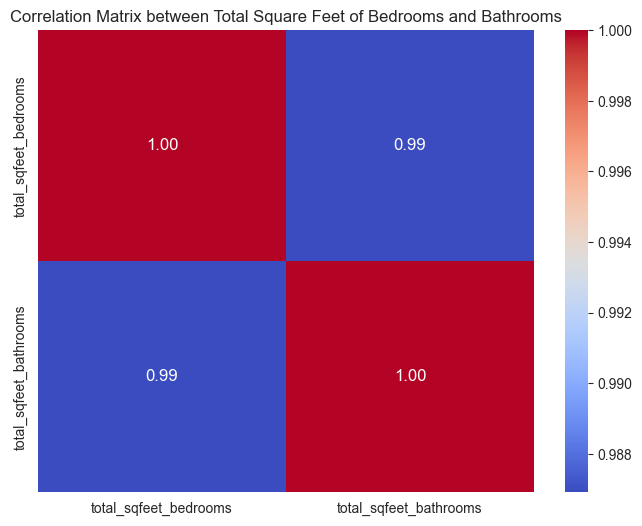

In [842]:
# Calculate correlation
correlation = house[['total_sqfeet_bedrooms', 'total_sqfeet_bathrooms']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix between Total Square Feet of Bedrooms and Bathrooms')
plt.show()

In [843]:
house.dropna(subset=['wheelchair_access', 'electric_vehicle_charge'], inplace=True)
house['wheelchair_access'].fillna(0, inplace=True)
house['electric_vehicle_charge'].fillna(0, inplace=True)

In [844]:
house['amenities_score'] = (house['parking_options'].notnull().astype(int) + 
                             house['laundry_options'].notnull().astype(int) + 
                             house['wheelchair_access'].astype(int) + 
                             house['electric_vehicle_charge'].astype(int))
print(house['amenities_score'])

0         2
1         2
2         2
3         2
4         3
         ..
384972    2
384973    2
384974    2
384975    2
384976    2
Name: amenities_score, Length: 384977, dtype: int32


In [845]:
is_a_parking = ['carport', 'attached garage', 'off-street parking', 'detached garage', 'valet parking']
house.parking_options=house.parking_options.apply(lambda x: 1 if x in is_a_parking else 0)

In [846]:
is_a_laundry = ['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg']
house.laundry_options=house.laundry_options.apply(lambda x: 1 if x in is_a_laundry else 0)

In [847]:
house.head(8)

,region,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,pets_allowed,total_sqfeet_bedrooms,total_sqfeet_bathrooms,amenities_score
0,reno / tahoe,1148,apartment,1078,3,2.0,0,0,0,0,1,1,39.5483,-119.796,California,1,3234,2156.0,2
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,1,1,39.5026,-119.789,California,0,2002,2002.0,2
2,reno / tahoe,1813,apartment,1683,2,2.0,1,0,0,0,1,1,39.6269,-119.708,California,1,3366,3366.0,2
3,reno / tahoe,1095,apartment,708,1,1.0,1,0,0,0,1,1,39.4477,-119.771,California,1,708,708.0,2
4,reno / tahoe,289,apartment,250,0,1.0,1,1,0,1,1,0,39.5357,-119.805,California,1,0,250.0,3
5,reno / tahoe,1093,apartment,720,1,1.0,1,0,0,0,1,0,39.4572,-119.776,California,1,720,720.0,2
6,reno / tahoe,935,apartment,661,1,1.0,1,0,0,0,1,1,39.5118,-119.802,California,1,661,661.0,2
7,reno / tahoe,1095,apartment,708,1,1.0,1,0,0,0,1,1,39.4477,-119.771,California,1,708,708.0,2


In [848]:
# Cleaning the region variable based on a forward slash ("/")
def region_forward_slash(x):
    if isinstance(x, str):
        tokens = x.split('/')
        return tokens[0].strip()
    else:
        return x  # Return the value as is if it's not a string (NaN)

house['region'] = house['region'].apply(region_forward_slash)

In [849]:
def strip_last_two_uppercase_chars(string):
    if string is not None and len(string) >= 2 and string[-2:].isupper():
        return string[:-2].strip()
    elif string is not None:
        return string.strip()  # Adjusted to strip trailing whitespaces
    else:
        return string

In [850]:
house.region.unique()[:10]

array(['reno', 'sacramento', 'boulder', 'visalia-tulare', 'santa barbara',
       'SF bay area', 'siskiyou county', 'ventura county', 'san diego',
       'san luis obispo'], dtype=object)

In [851]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [852]:
# Calculate the mean latitude and mean longitude
city_center_latitude = house['lat'].mean()
city_center_longitude = house['long'].mean()

# Print the city center coordinates
print("City Center Latitude:", city_center_latitude)
print("City Center Longitude:", city_center_longitude)

City Center Latitude: 37.23348675754909
City Center Longitude: -92.70063093006559


In [853]:
from geopy.distance import geodesic

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Identify latitude values outside the valid range
invalid_latitudes = house[(house['lat'] < -90) | (house['lat'] > 90)]

# Correct invalid latitude values by replacing them with NaN
house.loc[(house['lat'] < -90) | (house['lat'] > 90), 'lat'] = np.nan

# Drop rows with NaN latitude values
house = house.dropna(subset=['lat'])

# Calculate the distance from the city center
city_center_coords = (city_center_latitude, city_center_longitude)
house['distance_from_city_center'] = house.apply(lambda row: geodesic(city_center_coords, (row['lat'], row['long'])).miles, axis=1)

In [854]:
house.distance_from_city_center

0         1473.917553
1         1473.680878
2         1469.005602
3         1472.892067
4         1474.435027
             ...     
384972    1472.892067
384973    1469.005602
384974    1471.285909
384975    1468.925794
384976    1472.892067
Name: distance_from_city_center, Length: 384973, dtype: float64

In [855]:
house.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat', 'long', 'state',
       'pets_allowed', 'total_sqfeet_bedrooms', 'total_sqfeet_bathrooms',
       'amenities_score', 'distance_from_city_center'],
      dtype='object')

## Dimensionality Reduction

In [856]:
house.type.value_counts()

type
apartment          318028
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: count, dtype: int64

In [857]:
type_list = house.type.value_counts()[house.type.value_counts()<15885]

In [858]:
house.type=house.type.apply(lambda x: 'other' if x in type_list else x)

In [859]:
house.type.value_counts()

type
apartment    318028
house         33266
other         17794
townhouse     15885
Name: count, dtype: int64

In [860]:
house.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat', 'long', 'state',
       'pets_allowed', 'total_sqfeet_bedrooms', 'total_sqfeet_bathrooms',
       'amenities_score', 'distance_from_city_center'],
      dtype='object')

## Feature Understanding

In [861]:
#generate descriptive statistics for the DataFrame.
house.describe()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,pets_allowed,total_sqfeet_bedrooms,total_sqfeet_bathrooms,amenities_score,distance_from_city_center
count,3.849730e+05,3.849730e+05,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,384973.000000,3.849730e+05,3.849730e+05,384973.000000,3.849730e+05
mean,8.825805e+03,1.059900e+03,1.905344,1.480716,0.731768,0.082112,0.012871,0.048128,0.785320,0.584849,37.232813,-92.700061,0.694355,2.276474e+03,1.701896e+03,2.094983,8.085563e+02
std,4.462223e+06,1.915086e+04,3.494589,0.618062,0.443040,0.274536,0.112718,0.214037,0.410601,0.492749,5.528422,16.489883,0.460681,3.911407e+04,2.044304e+04,0.316284,5.037552e+02
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000,0.000000e+00,0.000000e+00,2.000000,1.724975e-12
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.470100,-99.779000,0.000000,7.800000e+02,7.500000e+02,2.000000,4.978716e+02
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.583300,-87.869300,1.000000,1.872000e+03,1.104000e+03,2.000000,7.058009e+02
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,41.137700,-81.225600,1.000000,2.452000e+03,2.200000e+03,2.000000,9.960712e+02
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,68.273100,172.633000,1.000000,1.677721e+07,8.388607e+06,4.000000,8.118505e+03


In [862]:
#generate rounded descriptive statistics for the DataFrame 'house' and transpose the result.
house.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,384973.0,8825.81,4462223.06,0.00,805.00,1036.00,1395.00,2.768307e+09
sqfeet,384973.0,1059.90,19150.86,0.00,750.00,949.00,1150.00,8.388607e+06
beds,384973.0,1.91,3.49,0.00,1.00,2.00,2.00,1.100000e+03
baths,384973.0,1.48,0.62,0.00,1.00,1.00,2.00,7.500000e+01
smoking_allowed,384973.0,0.73,0.44,0.00,0.00,1.00,1.00,1.000000e+00
wheelchair_access,384973.0,0.08,0.27,0.00,0.00,0.00,0.00,1.000000e+00
electric_vehicle_charge,384973.0,0.01,0.11,0.00,0.00,0.00,0.00,1.000000e+00
comes_furnished,384973.0,0.05,0.21,0.00,0.00,0.00,0.00,1.000000e+00
laundry_options,384973.0,0.79,0.41,0.00,1.00,1.00,1.00,1.000000e+00
parking_options,384973.0,0.58,0.49,0.00,0.00,1.00,1.00,1.000000e+00


## Removing Outliers

[]

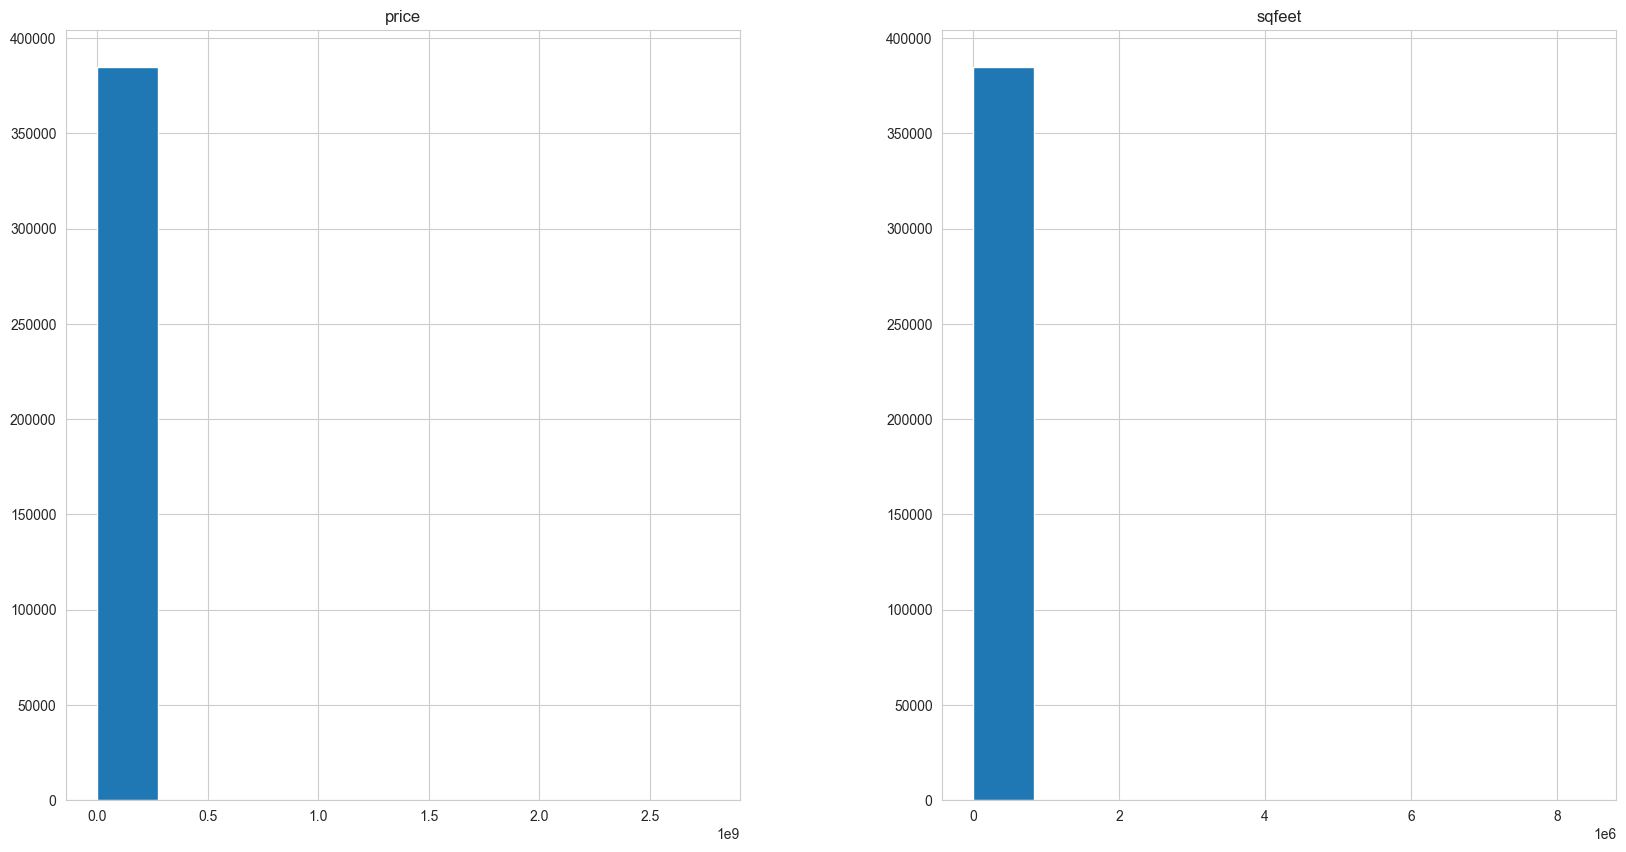

In [863]:
# Plot Numerical Variables
%matplotlib inline
house[['price', 'sqfeet']].hist(figsize=(20, 10))
plt.plot()

This visualization indicates that certain rental homes have a price listed as 0, along with a square footage of 0. As per zoning regulations, a house must have a minimum square footage of 120, and at least one room must be suitable for habitation. Therefore, we need to eliminate these outliers from the dataset.

In [864]:
outlier1 = ((house["sqfeet"]<120) | (house["sqfeet"]>5000) | (house["price"]<100) | (house["price"]>10000))
print("There is {} outlier".format(house[outlier1]["pets_allowed"].count()))

There is 3729 outlier


In [865]:
house = house[~outlier1]

In [866]:
house.shape

(381244, 20)

In [867]:
#checking how many values present
house.baths.value_counts()

baths
1.0     196053
2.0     133712
1.5      27183
2.5      13030
3.0       5470
0.0       3055
4.0       1427
3.5        969
4.5        204
5.0         79
5.5         45
6.0         12
75.0         2
6.5          1
25.0         1
7.5          1
Name: count, dtype: int64

In [868]:
#drop rows with non-finite values in the 'baths' column
house = house.dropna(subset=['baths'])

#convert the values in the 'baths' column from float to integer data type
house["baths"] = house["baths"].astype(int)

In [869]:
#checking how many values present
house.beds.value_counts()

beds
2       174101
1       116108
3        66281
4        11397
0        10867
5         2210
6          213
7           39
8           25
1100         2
1000         1
Name: count, dtype: int64

The majority of homes typically feature up to 3 bedrooms and 3 bathrooms. Hence, we should exclude properties with more than 4 bedrooms or 4 bathrooms. Additionally, considering that a typical 4-bedroom home ranges from approximately 2000 to 5000 square feet, we can filter out rental properties exceeding 5000 square feet in size.

In [870]:
outlier2 = ((house["beds"]>4) | (house["baths"]>4))
print("There is {} outlier".format(house[outlier2]["beds"].count()))

There is 2540 outlier


In [871]:
house = house[~outlier2]

In [872]:
house.shape

(378704, 20)

[]

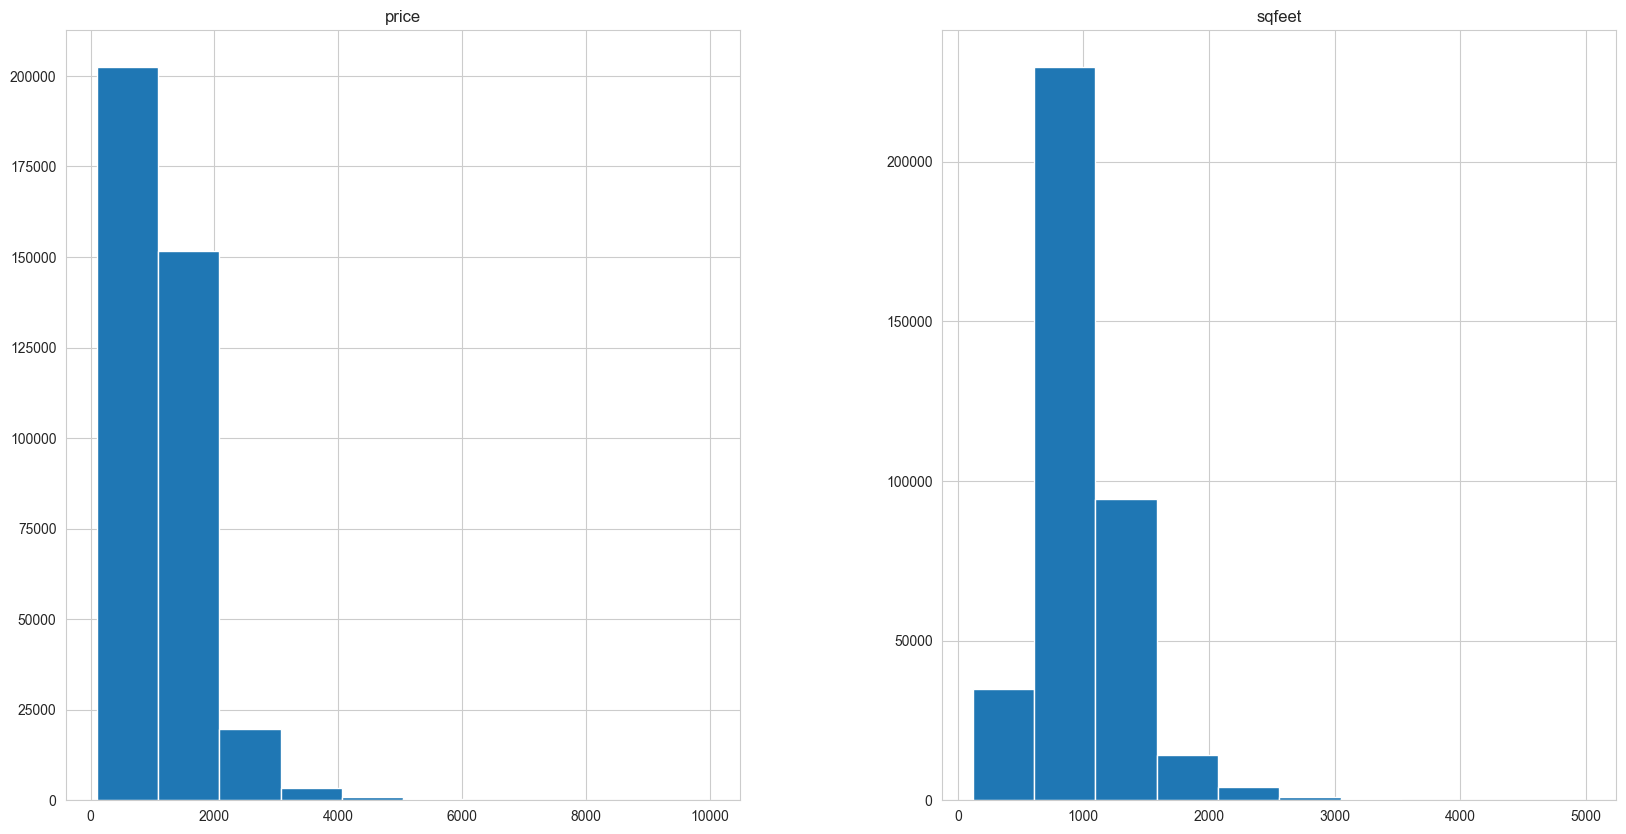

In [873]:
%matplotlib inline
house[['price','sqfeet']].hist(figsize=(20,10))
plt.plot()

The distribution of price and square footage data follows a normal distribution pattern. The majority of rental house prices fall within the range of 500 to 2000.

## Standardization

In [874]:
house.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat', 'long', 'state',
       'pets_allowed', 'total_sqfeet_bedrooms', 'total_sqfeet_bathrooms',
       'amenities_score', 'distance_from_city_center'],
      dtype='object')

In [875]:
from sklearn.preprocessing import StandardScaler

# Select columns for standardization
columns_to_standardize = ['sqfeet', 'beds', 'baths', 'total_sqfeet_bedrooms', 
                          'total_sqfeet_bathrooms', 'distance_from_city_center']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
house[columns_to_standardize] = scaler.fit_transform(house[columns_to_standardize])

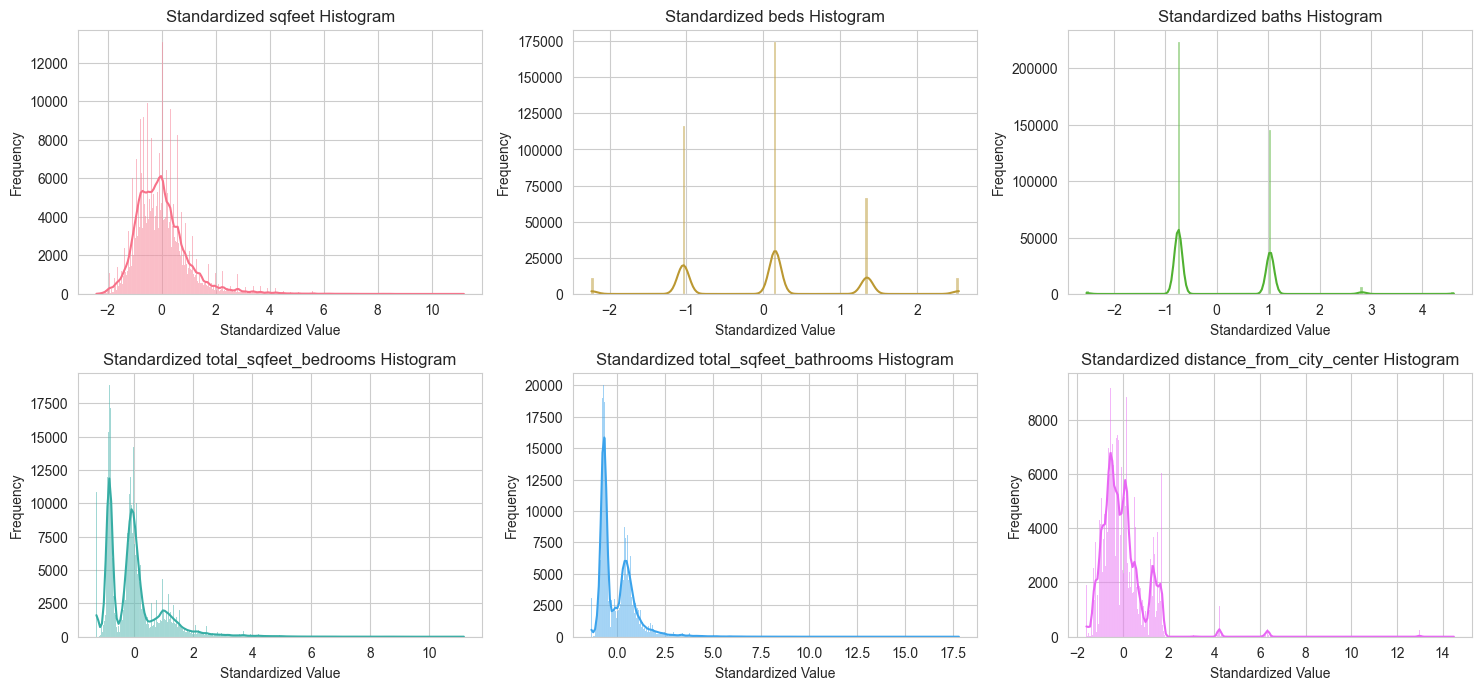

In [876]:
import matplotlib.pyplot as plt
import seaborn as sns

standardized_columns = ['sqfeet', 'beds', 'baths', 'total_sqfeet_bedrooms', 
                        'total_sqfeet_bathrooms', 'distance_from_city_center']

# Define a color palette
colors = sns.color_palette('husl', len(standardized_columns))

# Plot histograms for standardized columns with different colors
plt.figure(figsize=(15, 10))
for i, (column, color) in enumerate(zip(standardized_columns, colors), 1):
    plt.subplot(3, 3, i)
    sns.histplot(house[column], kde=True, color=color)
    plt.title(f'Standardized {column} Histogram')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Data Correlation

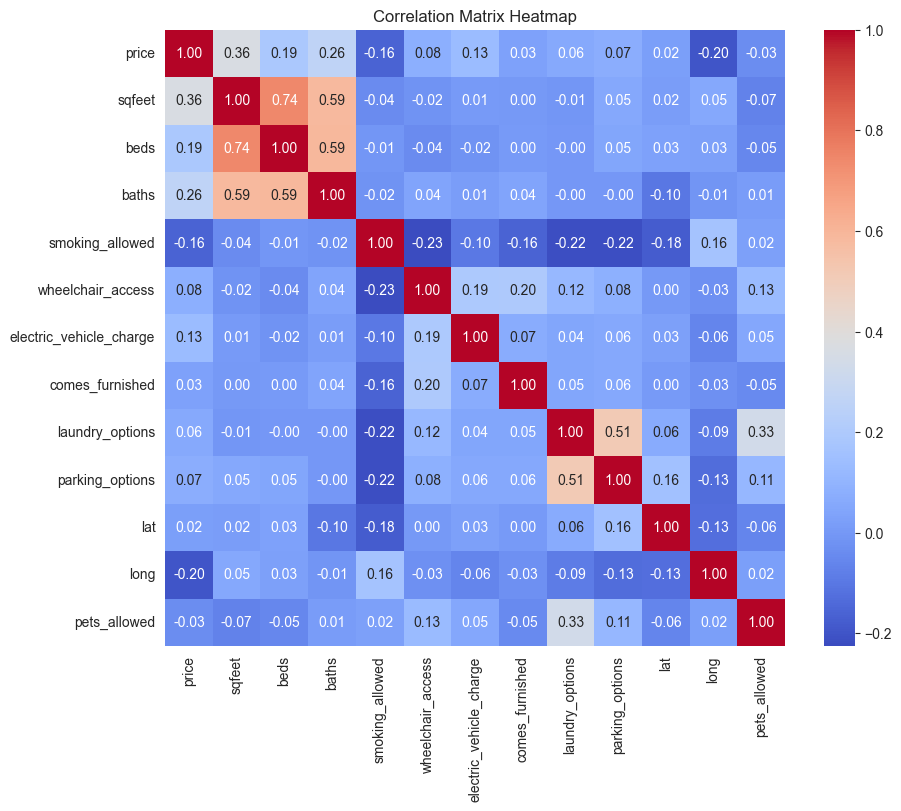

In [877]:
numerical_cols= ['price','sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
                 'comes_furnished','laundry_options', 'parking_options', 'lat', 'long','pets_allowed']

# Select only the numerical columns from 'house'
numeric_cols = house[numerical_cols]

# Calculate the correlation matrix for the selected numerical columns
correlation = numeric_cols.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Bedrooms and square footage exhibit a strong positive correlation, while baths and bedrooms also show a positive correlation.

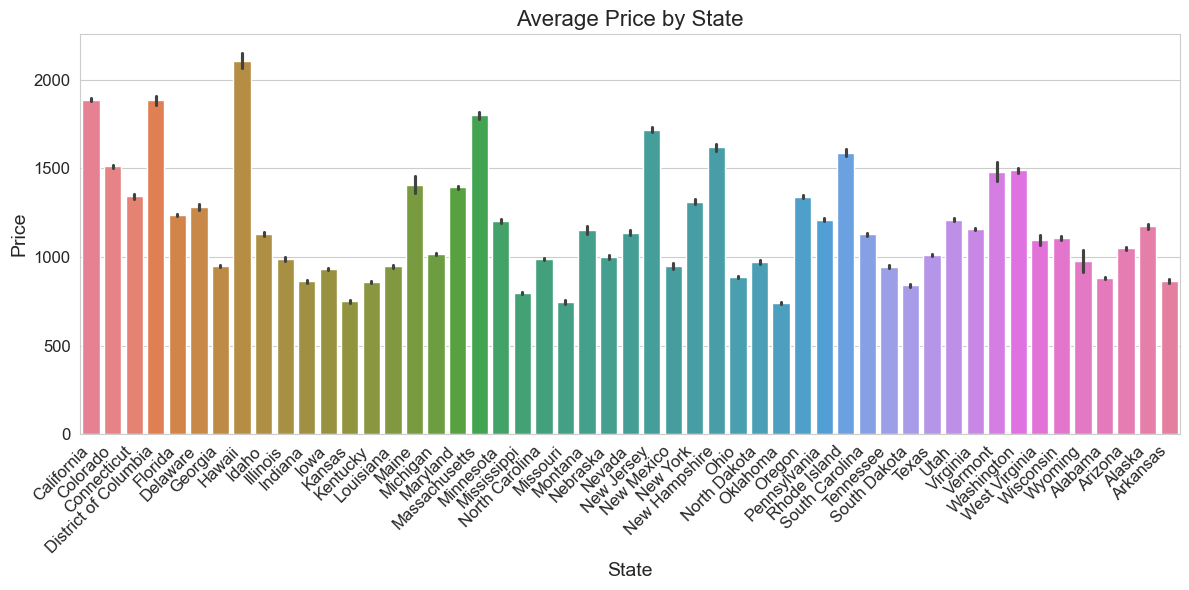

In [878]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define custom color palette
custom_palette = sns.color_palette("husl", len(house['state'].unique()))

# Bar Plot with adjusted x-axis labels and color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='state', y='price', data=house, palette=custom_palette)
plt.title('Average Price by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels and align to the right
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

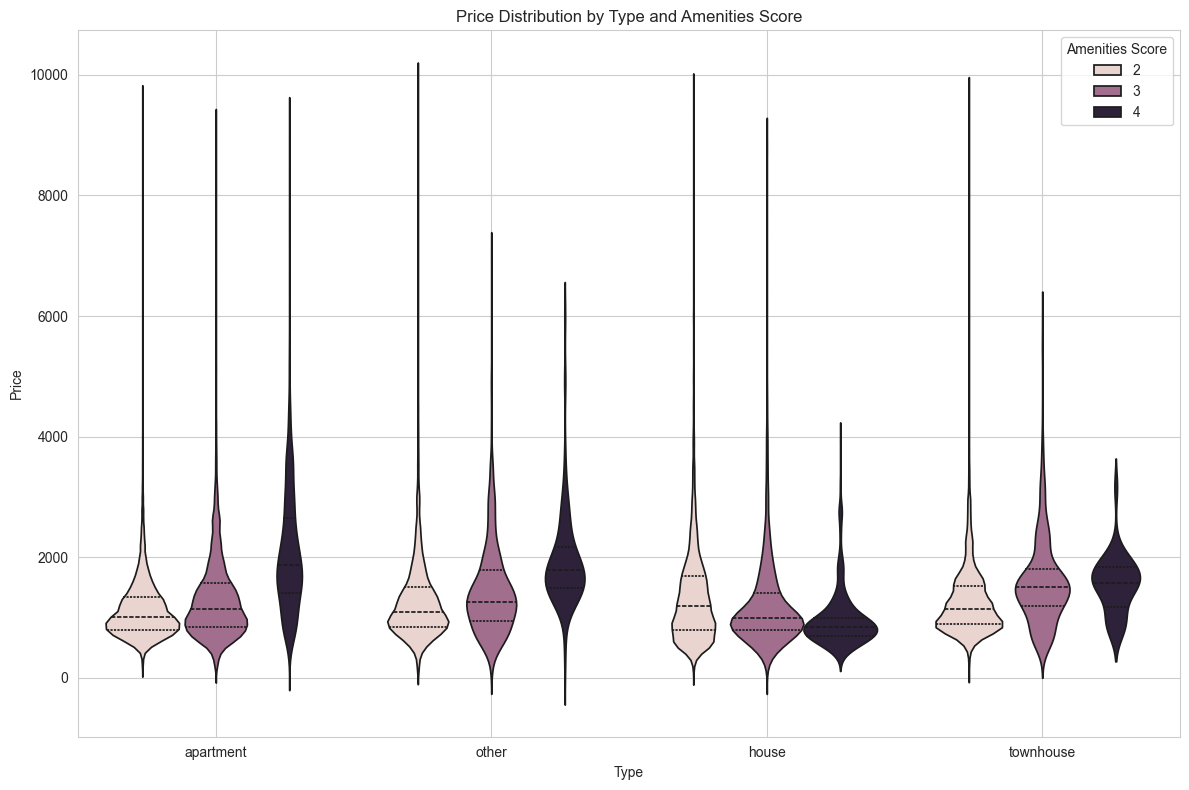

In [879]:
plt.figure(figsize=(12, 8))
# Create a violin plot to visualize the distribution of price by type and amenities score
sns.violinplot(x='type', y='price', data=house, hue='amenities_score', inner='quartile')
# Set title and labels
plt.title('Price Distribution by Type and Amenities Score')
plt.xlabel('Type')
plt.ylabel('Price')
# Add legend with title and adjust its location
plt.legend(title='Amenities Score', loc='upper right')
# Add grid and ensure tight layout
plt.grid(True)
plt.tight_layout()
# Display the plot
plt.show()

In [880]:
# Sort the DataFrame by distance_from_city_center
nearest_state = house.sort_values(by='distance_from_city_center').iloc[0]['state']

print("The state nearest to the city center is:", nearest_state)

The state nearest to the city center is: Delaware


In [881]:
# Filter the dataframe for listings close to the city center (you may adjust the threshold as needed)
threshold_distance = 10  # Define the threshold distance from the city center
close_to_city_center = house[house['distance_from_city_center'] <= threshold_distance]

# Group by state and calculate the average price
average_price_by_state = close_to_city_center.groupby('state')['price'].mean()

# Find the state with the highest average price
state_with_highest_price = average_price_by_state.idxmax()
highest_average_price = average_price_by_state.max()

print(f"The state with the highest average price for listings close to the city center is {state_with_highest_price} "
      f"with an average price of ${highest_average_price:.2f}")

The state with the highest average price for listings close to the city center is Hawaii with an average price of $2107.83


# Label Encoding With OneHOtEncoding

In [882]:
house.head()

,region,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,pets_allowed,total_sqfeet_bedrooms,total_sqfeet_bathrooms,amenities_score,distance_from_city_center
0,reno,1148,apartment,0.258029,1.349244,1.038490,0,0,0,0,1,1,39.5483,-119.796,California,1,0.727583,0.487717,2,1.320171
1,reno,1200,other,0.043477,0.153973,1.038490,0,0,0,0,1,1,39.5026,-119.789,California,0,-0.040520,0.356580,2,1.319702
2,reno,1813,apartment,1.943794,0.153973,1.038490,1,0,0,0,1,1,39.6269,-119.708,California,1,0.809880,1.518079,2,1.310433
3,reno,1095,apartment,-0.772935,-1.041299,-0.747711,1,0,0,0,1,1,39.4477,-119.771,California,1,-0.847278,-0.745312,2,1.318138
4,reno,289,apartment,-2.049101,-2.236570,-0.747711,1,1,0,1,1,0,39.5357,-119.805,California,1,-1.288688,-1.135317,3,1.321197


In [883]:
dummies1 = pd.get_dummies(house.region)
dummies2 = pd.get_dummies(house.type)
dummies3 = pd.get_dummies(house.state)
new_house = pd.concat([house,dummies1,dummies2,dummies3], axis = 'columns').drop(['region','type','state'], axis = 'columns')

In [884]:
new_house.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,pets_allowed,total_sqfeet_bedrooms,total_sqfeet_bathrooms,amenities_score,distance_from_city_center,SF bay area,abilene,akron,albany,albuquerque,altoona-johnstown,amarillo,ames,anchorage,ann arbor,annapolis,appleton-oshkosh-FDL,asheville,ashtabula,athens,atlanta,auburn,augusta,austin,bakersfield,baltimore,baton rouge,battle creek,beaumont,bellingham,bemidji,bend,billings,binghamton,birmingham,bismarck,bloomington,bloomington-normal,boise,boone,boston,boulder,bowling green,bozeman,brainerd,brownsville,brunswick,buffalo,butte,cape cod,catskills,cedar rapids,central NJ,central louisiana,central michigan,champaign urbana,charleston,charlotte,charlottesville,chattanooga,chautauqua,chicago,chico,chillicothe,cincinnati,clarksville,cleveland,clovis,college station,colorado springs,columbia,columbus,cookeville,corpus christi,corvallis,cumberland valley,dallas,danville,dayton,daytona beach,decatur,deep east texas,del rio,delaware,denver,des moines,detroit metro,dothan,...,the thumb,toledo,topeka,treasure coast,tri-cities,tucson,tulsa,tuscaloosa,tuscarawas co,twin falls,twin tiers NY,tyler,upper peninsula,utica-rome-oneida,valdosta,ventura county,vermont,victoria,visalia-tulare,waco,"washington, DC",waterloo,watertown,wausau,wenatchee,west virginia (old),western IL,western KY,western maryland,western massachusetts,western slope,wichita,wichita falls,williamsport,wilmington,winchester,winston-salem,worcester,wyoming,yakima,york,youngstown,yuba-sutter,yuma,zanesville,apartment,house,other,townhouse,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1148,0.258029,1.349244,1.038490,0,0,0,0,1,1,39.5483,-119.796,1,0.727583,0.487717,2,1.320171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1200,0.043477,0.153973,1.038490,0,0,0,0,1,1,39.5026,-119.789,0,-0.040520,0.356580,2,1.319702,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False

In [885]:
new_house.shape

(378704, 473)

# Build Model

In [886]:
# Splitting the data into features X and target variable Y
X = new_house.drop('price', axis = 'columns')
y = new_house.price
# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [887]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [888]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.6467918518357828

In [889]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [890]:
# Make predictions using the trained model on the test set
y_pred = lr.predict(X_test)

In [891]:
print(y_pred)

[1290.15332031 1500.33789062 1795.75488281 ...  543.14160156 1071.89257812
 1412.52148438]


In [892]:
# Calculate R-squared for training set
train_score = lr.score(X_train, y_train)

In [893]:
# Calculate R-squared for testing set
test_score = lr.score(X_test, y_test)

In [894]:
print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

Training R-squared score: 0.6469703387089787
Testing R-squared score: 0.6467918518357828


In [895]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [896]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [897]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [898]:
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r_squared = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [899]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error (MAE): 209.4360716382557
Mean Squared Error (MSE): 117449.22932302627
Root Mean Squared Error (RMSE): 342.7086653748724
Adjusted R-squared: 0.6445769099490114


In [900]:
ab_percentage = np.abs((y_test-y_pred) / y_test) * 100

In [901]:
mape = np.mean(ab_percentage)

In [902]:
print(mape)

19.196717285566567


In [903]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
d_regressor= DecisionTreeRegressor().fit(X_train, y_train)
d_regressor.score(X_test, y_test)

0.771313918576253

In [904]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(), X,y,cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))

In [905]:
score.mean()

0.6490383774570643

# Decision Tree Model Evaluation

In [906]:
# Calculate R-squared for testing set
dtrain_score = d_regressor.score(X_train, y_train)
dtest_score = d_regressor.score(X_test, y_test)

In [907]:
print("Training R-squared score:", dtrain_score)
print("Testing R-squared score:", dtest_score)

Training R-squared score: 0.9916985811209476
Testing R-squared score: 0.771313918576253


In [908]:
dy_pred = d_regressor.predict(X_test)

In [909]:
# Calculate Mean Absolute Error (MAE)
dmae = mean_absolute_error(y_test, dy_pred)
# Calculate Mean Squared Error (MSE)
dmse = mean_squared_error(y_test, dy_pred)
# Calculate Root Mean Squared Error (RMSE)
drmse = mean_squared_error(y_test, dy_pred, squared=False)
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r_squared = r2_score(y_test, dy_pred)
dadjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [910]:
print("Mean Absolute Error (MAE):", dmae)
print("Mean Squared Error (MSE):", dmse)
print("Root Mean Squared Error (RMSE):", drmse)
print("Adjusted R-squared:", dadjusted_r2)

Mean Absolute Error (MAE): 94.5015284479561
Mean Squared Error (MSE): 76042.99096643252
Root Mean Squared Error (RMSE): 275.7589363310508
Adjusted R-squared: 0.769879845259146


In [911]:
dab_percentage = np.abs((y_test-dy_pred) / y_test) * 100
dmape = np.mean(dab_percentage)
print(dmape)

7.773562056463717


In [912]:
from joblib import dump

In [913]:
dump(d_regressor, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [914]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [915]:
# Splitting the data into features X and target variable y
X = new_house.drop('price', axis='columns')
y = new_house['price']

In [916]:
# Splitting the data into training and testing sets
y=[(x-109)/4886 for x in y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [917]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [918]:
# Initialize Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()


In [919]:
# Train the model
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor()

In [920]:
# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test_scaled)

In [921]:
# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)


In [922]:
# Print evaluation metrics
print("Gradient Boosting Regression Mean Absolute Error (MAE):", mae_gb)
print("Gradient Boosting Regression Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting Regression Root Mean Squared Error (RMSE):", rmse_gb)
print("Gradient Boosting Regression R-squared score:", r2_gb)


Gradient Boosting Regression Mean Absolute Error (MAE): 0.04766548360304967
Gradient Boosting Regression Mean Squared Error (MSE): 0.0053855088048007866
Gradient Boosting Regression Root Mean Squared Error (RMSE): 0.07338602595045454
Gradient Boosting Regression R-squared score: 0.6133533889703762


In [923]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [924]:
# Splitting the data into features X and target variable y
X = new_house.drop('price', axis='columns')
y = new_house['price']

In [925]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [926]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [927]:
# Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.
# Use the scikit-learn wrapper classes: XGBRegressor and XGBClassifier. 

# try another machine learning algorithm : XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [928]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [929]:
#run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)

In [930]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
133900,1155,1342.007446
48383,2099,1837.983521
66295,1669,1702.739258
21703,815,1637.378174
147604,775,793.603271
...,...,...
70391,1485,1549.919556
89217,800,820.309998
110250,715,613.057129
62116,975,1083.683716


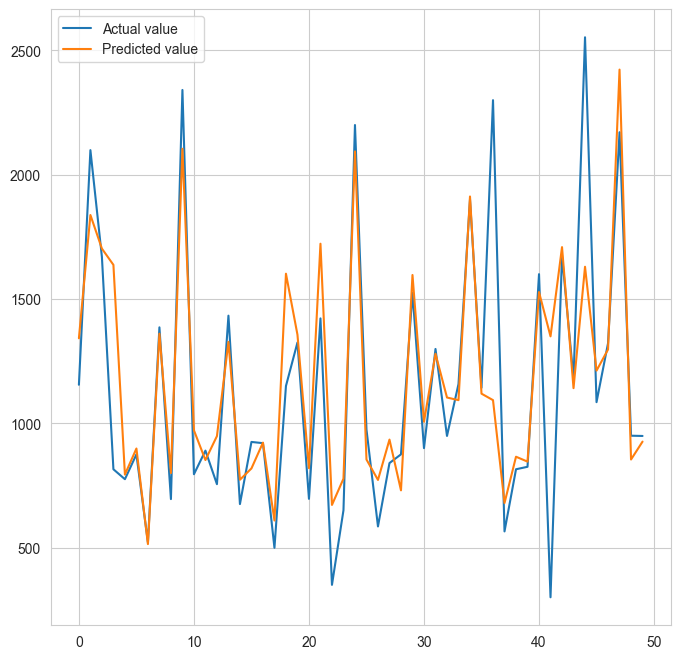

In [931]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [932]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 78.0%


In [933]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

74116.95044283665
272.24428449985254


In [934]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

164.60457333280587


In [937]:
import shap
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

100%|===================| 75383/75741 [01:25<00:00]        